In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(4 points) Build your first dataframe including at least on target variable and a set of features. In a markdown cell, clearly explain what the target variable is, what each row represents, and what the features are. Provide a summary of the entries in the dataframe (e.g. using a few plots and pd.describe)

* KC Harris (3+ hours). Sourced the 4-5 datasets, resolved NaN values, formateed to consistent weekly dates, and merged


A describe() table with a general idea of all of the feature values is displayed below. 

In [10]:
hab_df = pd.read_csv('final_HAB_merged_dataset.csv')
hab_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SURF_TEMP_C,700.0,18.285986,2.652405,13.200000,16.050000,18.044286,20.271429,2.562857e+01
SURF_SAL_PSU,700.0,33.557572,0.140183,32.435714,33.474048,33.565357,33.657440,3.392000e+01
Temp,700.0,17.974571,2.753031,12.900000,15.700000,17.600000,20.000000,2.550000e+01
Chl1,690.0,2.574913,4.124335,0.170000,1.090000,1.680000,2.532500,5.468000e+01
Chl2,690.0,2.571377,4.023961,0.120000,1.092500,1.660000,2.517500,5.669000e+01
Avg_Chloro,690.0,2.572971,4.070483,0.160000,1.100000,1.670000,2.517500,5.568000e+01
Phaeo1,690.0,0.631768,0.459313,0.000000,0.362500,0.540000,0.797500,4.230000e+00
Phaeo2,690.0,0.658116,0.532979,0.000000,0.360000,0.540000,0.790000,5.920000e+00
Avg_Phaeo,690.0,0.643565,0.486404,0.000000,0.370000,0.540000,0.790000,5.070000e+00
Phosphate,700.0,0.249214,0.129034,0.000000,0.170000,0.240000,0.310000,1.020000e+00


The target variable is the same as in the study: if chlorophyll values exceeded their 95th pctl. In this case, we've generated a target variable column 'hab_RT_status' (0/1) that simply provides a yes/no of if a given week had some form of a HAB (Harmful Algal Bloom). 

While there are too many features to display below (and a correlation-based display wouldn't be appropriate for our non-parametric classification model anyways), we've put some simple charts showing variations in chlorophyll, phaeo, and water temperature values over the weeks in this dataset. There are about 700 weeks total, and of those approximately 40 meet the threshold of a HAB. The 95th pctl threshold is displayed by the red dashed line above y=6 on the figure on the left. 

While there are many features to consider, we can address this with cross validation for subset selection, and can also supplement NaN values in the buoy with similar data from other buoys. We are simply including everything in this initial dataframe so that we can cross validate and test for our initial model.

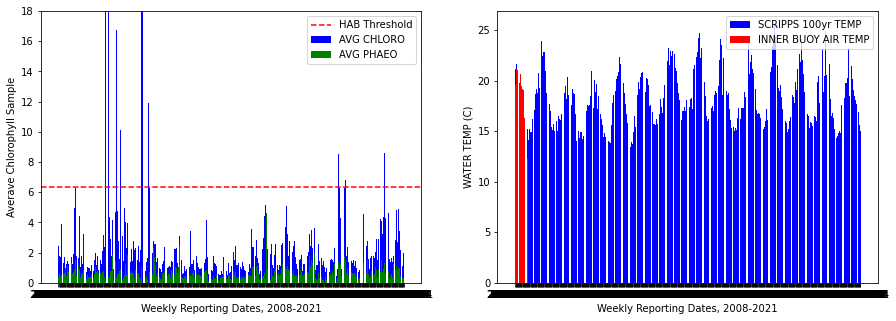

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

plt.bar(hab_df['datetime'],hab_df['Avg_Chloro'],color='b',label='AVG CHLORO')
plt.bar(hab_df['datetime'],hab_df['Avg_Phaeo'],color='g',label='AVG PHAEO')

plt.axhline(y = hab_df['Avg_Chloro'].quantile(.95), color="red", linestyle ="--",label='HAB Threshold')
plt.legend(loc=1)
plt.ylim(0,18)
plt.ylabel('Averave Chlorophyll Sample')
plt.xlabel('Weekly Reporting Dates, 2008-2021')



plt.subplot(1,2,2)


plt.bar(hab_df['datetime'],hab_df['SURF_TEMP_C'],color='b',label='SCRIPPS 100yr TEMP')
plt.bar(hab_df['datetime'],hab_df['air_temp_073'],color='red',label='INNER BUOY AIR TEMP')


plt.legend(loc=1)
plt.ylabel('WATER TEMP (C)')
plt.xlabel('Weekly Reporting Dates, 2008-2021')


plt.show()